In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:
# Load data
df = pd.read_csv('clean_data.csv')

In [5]:
# Load data features
X = df[['fat', 'sugar', 'sodium']].values

In [6]:
# Encode the target variable 'grade' as numerical values
le = LabelEncoder()
y = le.fit_transform(df['grade'])

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(3,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

/home/user/model-gizilo/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5164 - loss: 1.0783 - val_accuracy: 0.7938 - val_loss: 0.6421
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8089 - loss: 0.5672 - val_accuracy: 0.8580 - val_loss: 0.4267
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8507 - loss: 0.4170 - val_accuracy: 0.8849 - val_loss: 0.3449
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8988 - loss: 0.3202 - val_accuracy: 0.9359 - val_loss: 0.2736
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9054 - loss: 0.2713 - val_accuracy: 0.9318 - val_loss: 0.2396
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9409 - loss: 0.2241 - val_accuracy: 0.9422 - val_loss: 0.2018
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9438 - loss: 0.1861 - val_accuracy: 0.9513 - val_loss: 0.1667
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9574 - loss: 0.1571 - val_accu

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9911 - loss: 0.0257
Test loss: 0.021300412714481354
Test accuracy: 0.9925544261932373


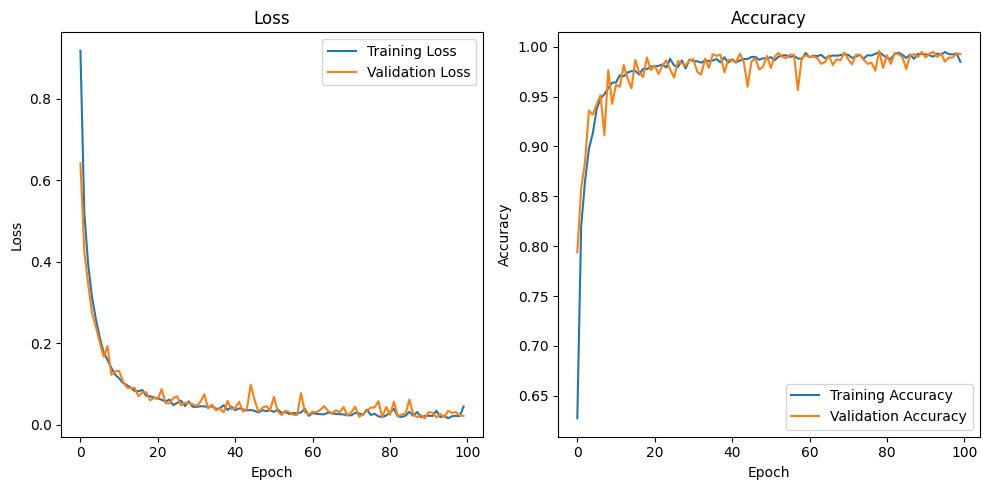

In [12]:
# Plot the loss and accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Use the model to make predictions
predictions = model.predict(X_test)
predicted_grades = le.inverse_transform(np.argmax(predictions, axis=1))
actual_grades = le.inverse_transform(y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [14]:
# Print the prediction results
for i in range(len(X_test)):
    print(f"Actual Grade: {actual_grades[i]}, Predicted Grade: {predicted_grades[i]}")

Actual Grade: D, Predicted Grade: D
Actual Grade: D, Predicted Grade: D
Actual Grade: A, Predicted Grade: A
Actual Grade: A, Predicted Grade: A
Actual Grade: A, Predicted Grade: A
Actual Grade: C, Predicted Grade: C
Actual Grade: A, Predicted Grade: A
Actual Grade: D, Predicted Grade: D
Actual Grade: A, Predicted Grade: A
Actual Grade: D, Predicted Grade: D
Actual Grade: C, Predicted Grade: C
Actual Grade: C, Predicted Grade: D
Actual Grade: A, Predicted Grade: A
Actual Grade: D, Predicted Grade: D
Actual Grade: A, Predicted Grade: A
Actual Grade: D, Predicted Grade: D
Actual Grade: C, Predicted Grade: C
Actual Grade: D, Predicted Grade: D
Actual Grade: A, Predicted Grade: A
Actual Grade: A, Predicted Grade: A
Actual Grade: D, Predicted Grade: D
Actual Grade: C, Predicted Grade: C
Actual Grade: D, Predicted Grade: D
Actual Grade: A, Predicted Grade: A
Actual Grade: D, Predicted Grade: D
Actual Grade: D, Predicted Grade: D
Actual Grade: D, Predicted Grade: D
Actual Grade: C, Predicted G

In [15]:
model.save('model_nutrient.h5')